In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
import scipy.io
from scipy import signal

import IPython

def cm_to_inch(value):
    return value/2.54

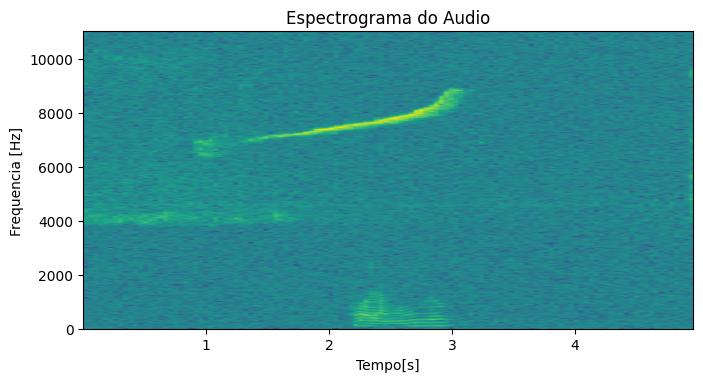

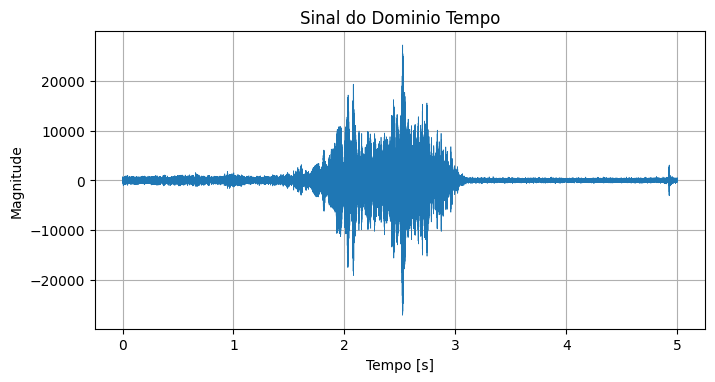

In [22]:
fs, data = scipy.io.wavfile.read('UnknownSound.wav')

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(data, NFFT=1024, Fs=fs)
plt.title('Espectrograma do Audio')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequencia [Hz]')

time = np.arange(0,len(data))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.plot(time/fs, data, linewidth=0.5)
plt.title('Sinal do Dominio Tempo')
plt.grid()
plt.xlabel('Tempo [s]')
plt.ylabel('Magnitude')

plt.show()

del time

In [23]:
print(f'Frequencia de amostragem do sinal: {fs}')

Frequencia de amostragem do sinal: 22050
